In [32]:
import visual_behavior_glm.GLM_visualization_tools as gvt
import visual_behavior_glm.GLM_analysis_tools as gat
import pandas as pd
import seaborn as sns
import numpy as np

In [1]:
%matplotlib notebook
%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


## results from running the GLM are cached in a mongo database. 

In [3]:
results = gat.retrieve_results()

### reconcile the different column names 'Full_avg_cv_var_test' and 'Full__avg_cv_var_test'

In [4]:
for idx,row in results.iterrows():
    for tt in ['train','test']:
        if pd.isnull(row['Full_avg_cv_var_{}'.format(tt)]) and pd.notnull(row['Full__avg_cv_var_{}'.format(tt)]):
            results.at[idx,'Full_avg_cv_var_{}'.format(tt)] = row['Full__avg_cv_var_{}'.format(tt)]

In [5]:
results['glm_version'].unique()

array(['3', '4_L2_optimize_by_session', '4_L2_fixed_lambda=1',
       '4_L2_optimize_by_cell', '2', '4_L2_opt_by_cell_tighter_grid',
       '4_L2_opt_by_session_tighter_grid', '5_L2_fixed_lambda=1',
       '5_L2_optimize_by_cell', '5_L2_optimize_by_session', '1',
       '6_L2_optimize_by_session', '6_L2_optimize_by_cell',
       'test_fixed_lambda=50', '7_L2_optimize_by_session'], dtype=object)

## Now plot variance explained for the versions that have been run as a batch

<IPython.core.display.Javascript object>


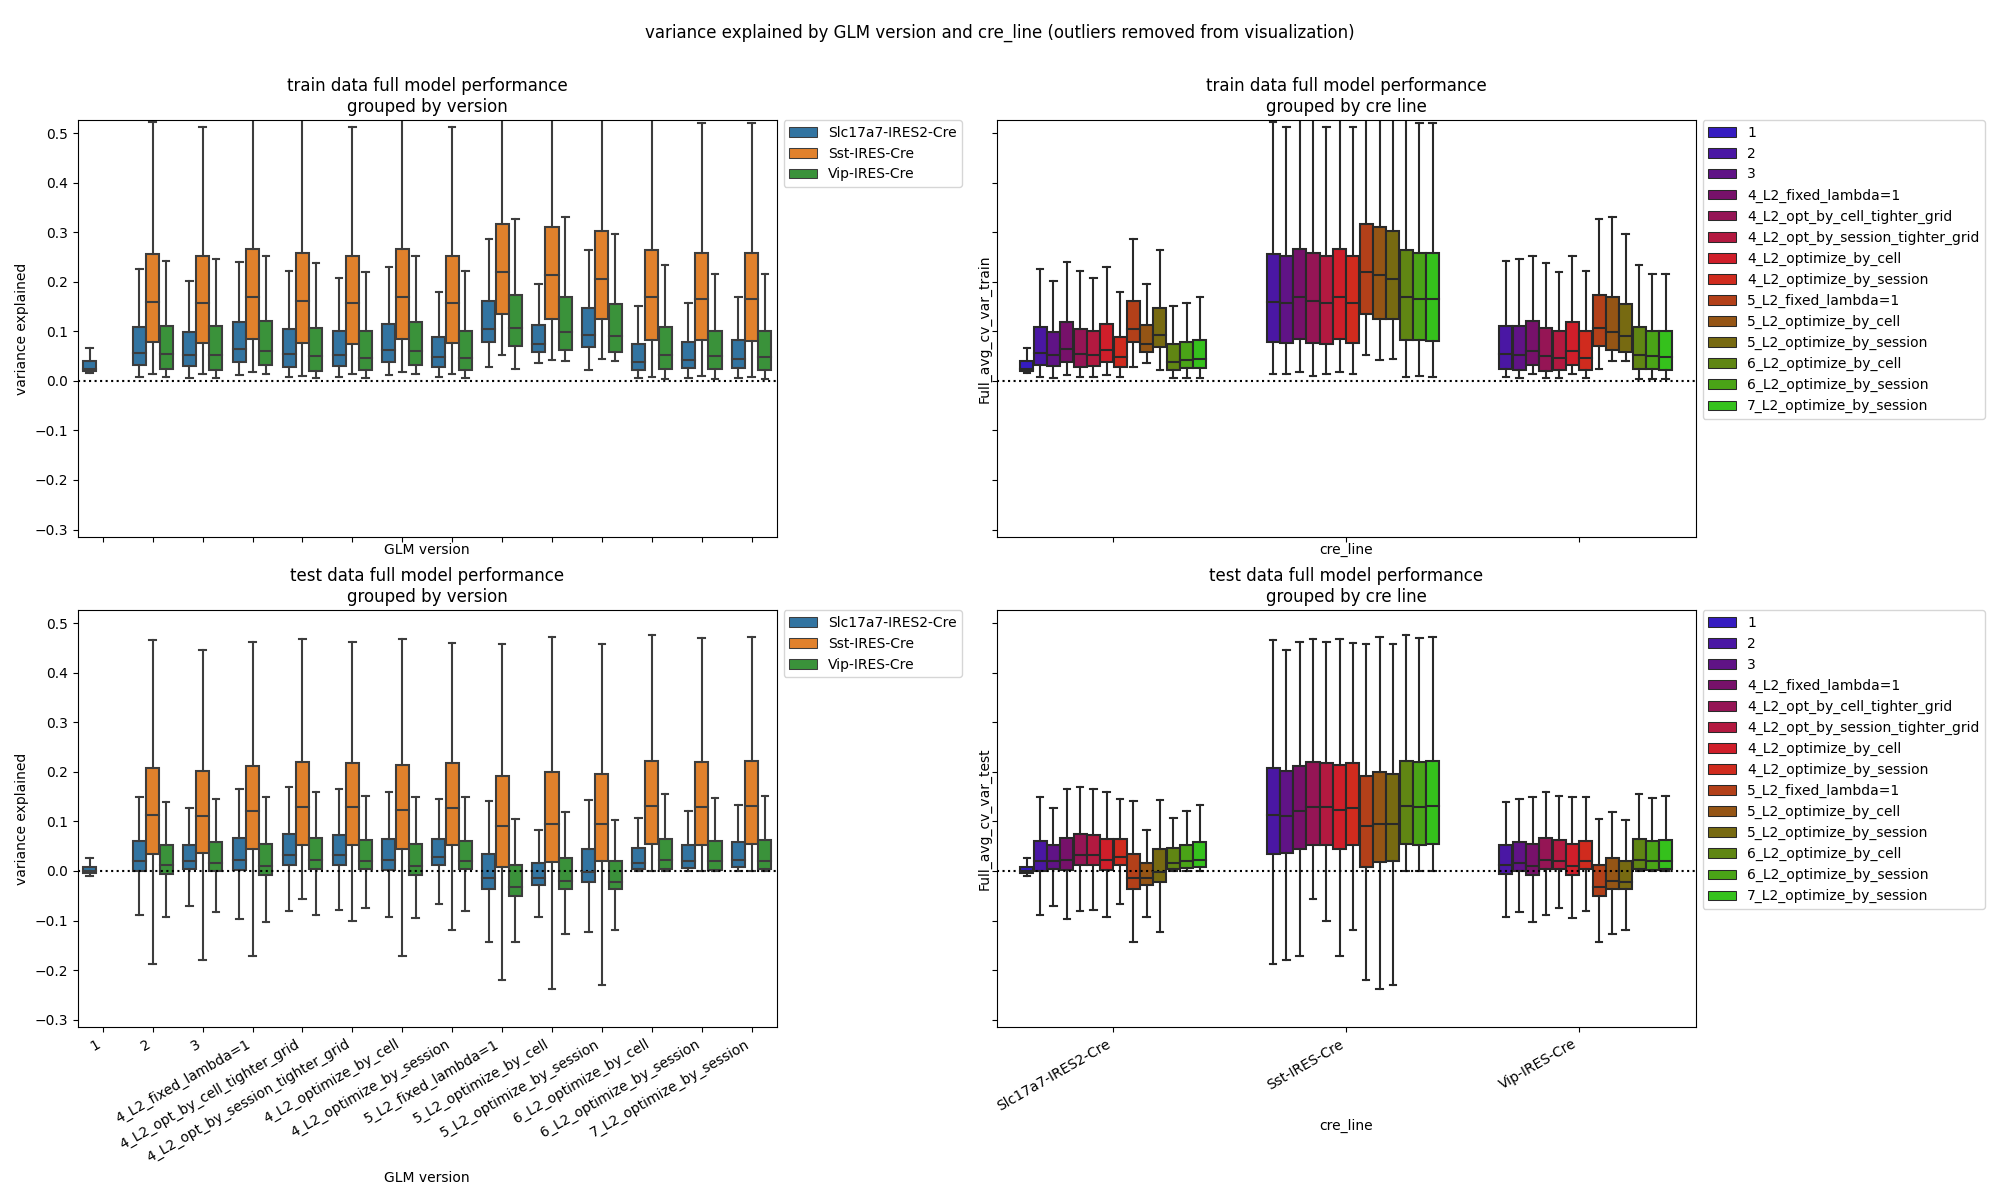

In [6]:
fig, ax = gvt.compare_var_explained(results[results['glm_version']!='test_fixed_lambda=50'], figsize=(20,12))

## get median variance explained for each version/cre-line

In [7]:
results_summary = results.groupby(['glm_version','cre_line'])['Full_avg_cv_var_test'].describe()
results_summary

count      mean  \
glm_version                      cre_line                               
1                                Slc17a7-IRES2-Cre    104.0  0.020638   
2                                Slc17a7-IRES2-Cre  38804.0  0.036867   
                                 Sst-IRES-Cre        1531.0  0.105114   
                                 Vip-IRES-Cre        4008.0 -0.028685   
3                                Slc17a7-IRES2-Cre  31660.0  0.008814   
                                 Sst-IRES-Cre        1090.0  0.115679   
                                 Vip-IRES-Cre        2931.0 -0.017609   
4_L2_fixed_lambda=1              Slc17a7-IRES2-Cre  37688.0  0.052536   
                                 Sst-IRES-Cre        1531.0  0.153570   
                                 Vip-IRES-Cre        4008.0 -0.083854   
4_L2_opt_by_cell_tighter_grid    Slc17a7-IRES2-Cre  37141.0  0.064336   
                                 Sst-IRES-Cre        1531.0  0.163134   
                                 Vip-IRES-Cre        4008.0  0.022281   
4_L2_opt_by_session_tighter_grid Slc17a7-IRES2-Cre  37669.0  0.061704   
                                 Sst-IRES-Cre        1531.0  0.160048   
                                 Vip-IRES-Cre        4008.0  0.010828   
4_L2_optimize_by_cell            Slc17a7-IRES2-Cre  37141.0  0.051412   
                                 Sst-IRES-Cre        1531.0  0.153185   
                                 Vip-IRES-Cre        4008.0 -0.019169   
4_L2_optimize_by_session         Slc17a7-IRES2-Cre  32008.0  0.056880   
                                 Sst-IRES-Cre        1531.0  0.159592   
                                 Vip-IRES-Cre        4008.0  0.003890   
5_L2_fixed_lambda=1              Slc17a7-IRES2-Cre  35819.0  0.015426   
                                 Sst-IRES-Cre        1237.0  0.124133   
                                 Vip-IRES-Cre        3195.0 -0.016277   
5_L2_optimize_by_cell            Slc17a7-IRES2-Cre  12875.0  0.015353   
                                 Sst-IRES-Cre        1237.0  0.132081   
                                 Vip-IRES-Cre        2878.0 -0.000269   
5_L2_optimize_by_session         Slc17a7-IRES2-Cre  35819.0  0.027229   
                                 Sst-IRES-Cre        1237.0  0.130195   
                                 Vip-IRES-Cre        3179.0 -0.003277   
6_L2_optimize_by_cell            Slc17a7-IRES2-Cre  44414.0  0.045066   
                                 Sst-IRES-Cre        2730.0  0.162117   
                                 Vip-IRES-Cre        8146.0  0.045840   
6_L2_optimize_by_session         Slc17a7-IRES2-Cre  58971.0  0.047626   
                                 Sst-IRES-Cre        2730.0  0.160000   
                                 Vip-IRES-Cre        8339.0  0.043776   
7_L2_optimize_by_session         Slc17a7-IRES2-Cre  67702.0  0.051496   
                                 Sst-IRES-Cre        2730.0  0.161641   
                                 Vip-IRES-Cre        8339.0  0.044541   
test_fixed_lambda=50             Vip-IRES-Cre          41.0  0.034249   

                                                         std         min  \
glm_version                      cre_line                                  
1                                Slc17a7-IRES2-Cre  0.072210   -0.083875   
2                                Slc17a7-IRES2-Cre  0.149529   -5.005286   
                                 Sst-IRES-Cre       0.686418  -22.432700   
                                 Vip-IRES-Cre       1.234790  -65.585382   
3                                Slc17a7-IRES2-Cre  0.263403  -10.789742   
                                 Sst-IRES-Cre       0.326089   -4.459997   
                                 Vip-IRES-Cre       1.961289  -99.453246   
4_L2_fixed_lambda=1              Slc17a7-IRES2-Cre  0.102667   -4.160537   
                                 Sst-IRES-Cre       0.154733   -0.316459   
                                 Vip-IRES-Cre       5.006574 -286.955881   
4_

In [19]:
glm_versions = ['6_L2_optimize_by_session','7_L2_optimize_by_session']
results_subset = results.query('glm_version in @glm_versions').copy()
def make_identifier(row):
    return '{}_{}'.format(row['ophys_experiment_id'],row['cell_specimen_id'])
results_subset['identifier'] = results_subset.apply(make_identifier, axis=1)

In [52]:
pivoted_results = results_subset.pivot(index='identifier', columns='glm_version',values='Full_avg_cv_var_test')
cols= [col for col in results_subset.columns if col not in pivoted_results.columns and 'test' not in col and 'train' not in col and '__' not in col and 'dropout' not in col]

In [53]:
cols

['_id',
 'cell_specimen_id',
 'ophys_experiment_id',
 'ophys_session_id',
 'behavior_session_id',
 'glm_version',
 'entry_time_utc',
 'container_id',
 'project_code',
 'container_workflow_state',
 'experiment_workflow_state',
 'session_name',
 'session_type',
 'equipment_name',
 'date_of_acquisition',
 'isi_experiment_id',
 'specimen_id',
 'sex',
 'age_in_days',
 'full_genotype',
 'reporter_line',
 'driver_line',
 'imaging_depth',
 'targeted_structure',
 'published_at',
 'super_container_id',
 'cre_line',
 'session_tags',
 'failure_tags',
 'exposure_number',
 'model_outputs_available',
 'location',
 'has_events',
 'session_number',
 'identifier']

In [54]:
results_subset[cols]

,_id,cell_specimen_id,ophys_experiment_id,ophys_session_id,behavior_session_id,glm_version,entry_time_utc,container_id,project_code,container_workflow_state,...,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number,identifier
386946,5f4f3569dd32c82ff30675f5,1028820226,959388794,958772311,958888263.0,6_L2_optimize_by_session,2020-09-02 16:59:09.199870,1018028348,VisualBehaviorMultiscope,completed,...,850862430,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_300,True,5,959388794_1028820226
386947,5f4f3569dd32c82ff30675f6,1028820231,959388794,958772311,958888263.0,6_L2_optimize_by_session,2020-09-02 16:59:09.210235,1018028348,VisualBehaviorMultiscope,completed,...,850862430,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_300,True,5,959388794_1028820231
386948,5f4f3569dd32c82ff30675f7,1028820263,959388794,958772311,958888263.0,6_L2_optimize_by_session,2020-09-02 16:59:09.220619,1018028348,VisualBehaviorMultiscope,completed,...,850862430,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_300,True,5,959388794_1028820263
386949,5f4f3569dd32c82ff30675f8,1028820278,959388794,958772311,958888263.0,6_L2_optimize_by_session,2020-09-02 16:59:09.230643,1018028348,VisualBehaviorMultiscope,completed,...,850862430,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_300,True,5,959388794_1028820278
386950,5f4f3569dd32c82ff30675f9,1028820296,959388794,958772311,958888263.0,6_L2_optimize_by_session,2020-09-02 16:59:09.240362,1018028348,VisualBehaviorMultiscope,completed,...,850862430,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_300,True,5,959388794_1028820296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
591083,5f6fc67a946afe2b63725105,961978351,847241639,846605051,NaN,7_L2_optimize_by_session,2020-09-26 22:53:46.364883,876693136,VisualBehavior,container_qc,...,814111935,Slc17a7-IRES2-Cre,NaN,NaN,0,False,Slc17a7_VISp_175,False,5,847241639_961978351
591084,5f6fc67a946afe2b63725106,961988279,847241639,846605051,NaN,7_L2_optimize_by_session,2020-09-26 22:53:46.370754,876693136,VisualBehavior,container_qc,...,814111935,Slc17a7-IRES2-Cre,NaN,NaN,0,False,Slc17a7_VISp_175,False,5,847241639_961988279
591085,5f6fc67a946afe2b63725107,961974218,847241639,846605051,NaN,7_L2_optimize_by_session,2020-09-26 22:53:46.377830,876693136,VisualBehavior,container_qc,...,814111935,Slc17a7-IRES2-Cre,NaN,NaN,0,False,Slc17a7_VISp_175,False,5,847241639_961974218
591086,5f6fc67a946afe2b63725108,961988056,847241639,846605051,NaN,7_L2_optimize_by_session,2020-09-26 22:53:46.383788,876693136,VisualBehavior,container_qc,...,814111935,Slc17a7-IRES2-Cre,NaN,NaN,0,False,Slc17a7_VISp_175,False,5,847241639_961988056


In [55]:
df = pivoted_results.merge(
    results_subset[cols],
    left_on='identifier',
    right_on='identifier',
    how='left'
)
df

,identifier,6_L2_optimize_by_session,7_L2_optimize_by_session,_id,cell_specimen_id,ophys_experiment_id,ophys_session_id,behavior_session_id,glm_version,entry_time_utc,...,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,model_outputs_available,location,has_events,session_number
0,1000743008_1003146172,0.070881,0.073235,5f51615d129824618dce03ef,1003146172,1000743008,1000580083,1.000601e+09,6_L2_optimize_by_session,2020-09-03 21:34:21.170110,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
1,1000743008_1003146172,0.070881,0.073235,5f6ee2c40f176aed362cc373,1003146172,1000743008,1000580083,NaN,7_L2_optimize_by_session,2020-09-26 06:42:12.599508,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
2,1000743008_1003146177,0.000000,0.000231,5f51615d129824618dce03f0,1003146177,1000743008,1000580083,1.000601e+09,6_L2_optimize_by_session,2020-09-03 21:34:21.174977,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
3,1000743008_1003146177,0.000000,0.000231,5f6ee2c40f176aed362cc374,1003146177,1000743008,1000580083,NaN,7_L2_optimize_by_session,2020-09-26 06:42:12.605935,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
4,1000743008_1003146180,0.050694,0.051451,5f51615d129824618dce03f1,1003146180,1000743008,1000580083,1.000601e+09,6_L2_optimize_by_session,2020-09-03 21:34:21.179974,...,NaN,951667115,Sst-IRES-Cre,NaN,NaN,0,True,Sst_VISp_275,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148806,995622557_996068361,0.000000,0.005628,5f6e9a6d1d0ec1728be9ff36,996068361,995622557,995560574,NaN,7_L2_optimize_by_session,2020-09-26 01:33:33.357703,...,NaN,910267443,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_275,True,5
148807,995622557_996068370,0.000000,0.000000,5f4f3c80d48da5fa23b08a3f,996068370,995622557,995560574,9.955708e+08,6_L2_optimize_by_session,2020-09-02 16:59:12.427502,...,NaN,910267443,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_275,True,5
148808,995622557_996068370,0.000000,0.000000,5f6e9a6d1d0ec1728be9ff3b,996068370,995622557,995560574,NaN,7_L2_optimize_by_session,2020-09-26 01:33:33.402773,...,NaN,910267443,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_275,True,5
148809,995622557_996068378,0.000000,0.003757,5f4f3c80d48da5fa23b08a44,996068378,995622557,995560574,9.955708e+08,6_L2_optimize_by_session,2020-09-02 16:59:12.468758,...,NaN,910267443,Sst-IRES-Cre,NaN,NaN,0,False,Sst_VISp_275,True,5


<IPython.core.display.Javascript object>


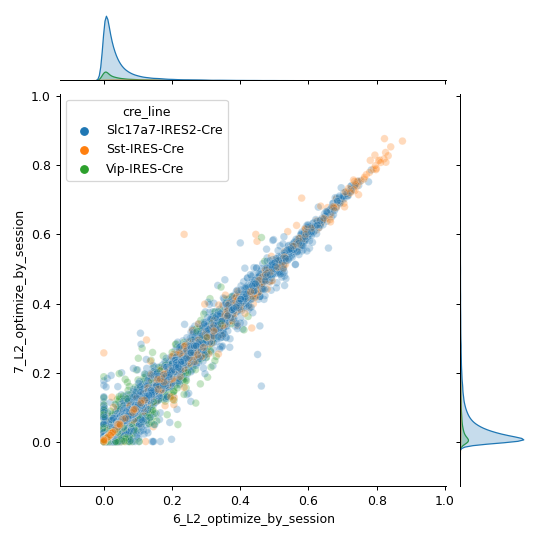

In [56]:
sns.jointplot(
    data = df,
    x='6_L2_optimize_by_session',
    y='7_L2_optimize_by_session',
    hue='cre_line',
    hue_order=np.sort(df['cre_line'].unique()),
    alpha=0.15
)